# This notebook will create a Zarr for population with HIV data 
## Based on data captured from https://aidsinfo.unaids.org/

In [21]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import xarray as xr
#import load_covid_data
import glob 

import seaborn as sns
sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

In [23]:
DATA_PATH = "/Users/nadeem/Downloads/COVID_HIV/"

In [27]:
d = {}
for filename in glob.glob(DATA_PATH+'*AIDS-related deaths*xls'):
    print(filename)
    Outfile = filename.split('/')[-1].split('_ ')[-1].split('.')[0]
#    if "test" in filename:
    d[Outfile] = pd.read_excel(filename)

/Users/nadeem/Downloads/COVID_HIV/AIDS-related deaths_Number of AIDS-related deaths_Population_ Female adults (15+).xls
/Users/nadeem/Downloads/COVID_HIV/AIDS-related deaths_Number of AIDS-related deaths_Population_ Young men (15-24).xls
/Users/nadeem/Downloads/COVID_HIV/AIDS-related deaths_Number of AIDS-related deaths_Population_ Male adolescents (10-19).xls
/Users/nadeem/Downloads/COVID_HIV/AIDS-related deaths_Number of AIDS-related deaths_Population_ Adolescents (10-19).xls
/Users/nadeem/Downloads/COVID_HIV/AIDS-related deaths_Number of AIDS-related deaths_Population_ All ages.xls
/Users/nadeem/Downloads/COVID_HIV/AIDS-related deaths_Number of AIDS-related deaths_Population_ Children (0-14).xls
/Users/nadeem/Downloads/COVID_HIV/AIDS-related deaths_Number of AIDS-related deaths_Population_ People aged 50 and over.xls
/Users/nadeem/Downloads/COVID_HIV/AIDS-related deaths_Number of AIDS-related deaths_Population_ Female adolescents (10-19).xls
/Users/nadeem/Downloads/COVID_HIV/AIDS-re

In [28]:
for Mykey in d.keys():
    d[Mykey] = d[Mykey].T
    d[Mykey].columns = d[Mykey].iloc[0]
    d[Mykey].drop(d[Mykey].index[0],inplace=True)

    print(f"Done with: {Mykey}")

Done with: Female adults (15+)
Done with: Young men (15-24)
Done with: Male adolescents (10-19)
Done with: Adolescents (10-19)
Done with: All ages
Done with: Children (0-14)
Done with: People aged 50 and over
Done with: Female adolescents (10-19)
Done with: Male adults (15+)
Done with: Young women (15-24)


In [29]:
d['Female adults (15+)'].head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Global
1990,<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<200 [<100 - <500],<100 [<100 - <100],<200 [<100 - <200],<100 [<100 - <100],<100 [<100 - <100],... [... - ...],... [... - ...],...,4500 [2800 - 6600],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],2800 [2200 - 3600],5200 [4100 - 6600],69 000 [50 000 - 97 000]
1991,<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<200 [<100 - <500],<100 [<100 - <100],<200 [<200 - <500],<100 [<100 - <100],<100 [<100 - <100],... [... - ...],... [... - ...],...,6300 [4000 - 9000],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],4000 [3200 - 5300],7900 [6200 - 10 000],95 000 [68 000 - 130 000]
1992,<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<500 [<200 - <500],<100 [<100 - <100],<500 [<200 - <500],<100 [<100 - <100],<100 [<100 - <100],... [... - ...],... [... - ...],...,8500 [5600 - 12 000],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],5600 [4500 - 7300],11 000 [8900 - 14 000],130 000 [91 000 - 180 000]
1993,<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<500 [<200 - <1000],<100 [<100 - <100],<500 [<500 - <500],<100 [<100 - <100],<100 [<100 - <100],... [... - ...],... [... - ...],...,11 000 [7600 - 15 000],... [... - ...],<100 [<100 - <100],<100 [<100 - <200],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],7500 [6000 - 9800],16 000 [12 000 - 20 000],160 000 [120 000 - 230 000]
1994,<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<500 [<500 - <1000],<100 [<100 - <100],<500 [<500 - <500],<100 [<100 - <100],<100 [<100 - <100],... [... - ...],... [... - ...],...,14 000 [9900 - 19 000],... [... - ...],<100 [<100 - <100],<200 [<100 - <200],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],9700 [7700 - 13 000],21 000 [16 000 - 26 000],200 000 [150 000 - 290 000]


In [30]:
for Mykey in d.keys():
    print(Mykey)

Female adults (15+)
Young men (15-24)
Male adolescents (10-19)
Adolescents (10-19)
All ages
Children (0-14)
People aged 50 and over
Female adolescents (10-19)
Male adults (15+)
Young women (15-24)


In [31]:
tmp0 = xr.Dataset({'Female15plus':(('time', 'country'), d['Female adults (15+)'].values),
                   'Male15_24':(('time', 'country'), d['Young men (15-24)'].values),
                   'Male10_19':(('time', 'country'), d['Male adolescents (10-19)'].values),
                   'All10_19':(('time', 'country'), d['Adolescents (10-19)'].values),
                   'AllAges':(('time', 'country'), d['All ages'].values),
                   'Children0_14':(('time', 'country'), d['Children (0-14)'].values),
                   'AllAge50plus':(('time', 'country'), d['People aged 50 and over'].values),
                   'Female10_19':(('time', 'country'), d['Female adolescents (10-19)'].values),
                   'Male15plus':(('time', 'country'), d['Male adults (15+)'].values),
                   'Female15_24':(('time', 'country'), d['Young women (15-24)'].values)},
                  coords={'year':d['All ages'].index,
                          'country':d['All ages'].columns.values})

In [32]:
tmp0.attrs['units'] = 'Million'

In [33]:
tmp0

<xarray.Dataset>
Dimensions:       (country: 178, time: 29, year: 29)
Coordinates:
  * year          (year) object '1990' '1991' '1992' ... '2016' '2017' '2018'
  * country       (country) object 'Afghanistan' 'Albania' ... 'Global'
Dimensions without coordinates: time
Data variables:
    Female15plus  (time, country) object '<100 [<100 - <100]' ... '270 000 [200 000 - 380 000]'
    Male15_24     (time, country) object '<100 [<100 - <100]' ... '20 000 [12 000 - 32 000]'
    Male10_19     (time, country) object '<100 [<100 - <100]' ... '16 000 [12 000 - 23 000]'
    All10_19      (time, country) object '<100 [<100 - <100]' ... '33 000 [22 000 - 47 000]'
    AllAges       (time, country) object '<100 [<100 - <100]' ... '770 000 [570 000 - 1 100 000]'
    Children0_14  (time, country) object '<100 [<100 - <100]' ... '100 000 [64 000 - 160 000]'
    AllAge50plus  (time, country) object '<100 [<100 - <100]' ... '150 000 [92 000 - 270 000]'
    Female10_19   (time, country) object '<100 [<100 - <100]' ... '16 000 [10 000 - 24 000]'
    Male15plus    (time, country) object '<100 [<100 - <100]' ... '400 000 [300 000 - 550 000]'
    Female15_24   (time, country) object '<100 [<100 - <100]' ... '25 000 [13 000 - 43 000]'
Attributes:
    units:    Million

In [34]:
ToSave = True

In [35]:
if ToSave:
    tmp0.to_zarr(DATA_PATH+'HIV_AIDS-related_deaths.zarr','w')

In [74]:
tmp0.sel(country='South Africa')

<xarray.Dataset>
Dimensions:       (time: 29, year: 29)
Coordinates:
  * year          (year) object '1990' '1991' '1992' ... '2016' '2017' '2018'
    country       <U12 'South Africa'
Dimensions without coordinates: time
Data variables:
    Female15plus  (time) object '<500 [<200 - <500]' ... '33 000 [23 000 - 45 000]'
    Male15_24     (time) object '<100 [<100 - <100]' ... '1500 [<1000 - 2400]'
    Male10_19     (time) object '<100 [<100 - <100]' ... '<1000 [<1000 - 1400]'
    All10_19      (time) object '<100 [<100 - <200]' ... '2300 [1200 - 4000]'
    AllAges       (time) object '1300 [<1000 - 1800]' ... '71 000 [52 000 - 91 000]'
    Children0_14  (time) object '<1000 [<1000 - <1000]' ... '4400 [1900 - 15 000]'
    AllAge50plus  (time) object '<100 [<100 - <200]' ... '10 000 [5300 - 19 000]'
    Female10_19   (time) object '<100 [<100 - <200]' ... '1400 [<1000 - 2600]'
    Male15plus    (time) object '<500 [<100 - <500]' ... '33 000 [26 000 - 46 000]'
    Female15_24   (time) object '<100 [<100 - <500]' ... '3900 [1400 - 7900]'
Attributes:
    units:    Million

In [75]:
tmp0.sel(country='South Africa')['AllAges']

<xarray.DataArray 'AllAges' (time: 29)>
array(['1300 [<1000 - 1800]', '2400 [1500 - 3500]', '4300 [2800 - 6300]',
       '7500 [5000 - 11 000]', '13 000 [8300 - 18 000]',
       '20 000 [13 000 - 30 000]', '30 000 [20 000 - 44 000]',
       '44 000 [28 000 - 62 000]', '61 000 [39 000 - 86 000]',
       '80 000 [52 000 - 110 000]', '100 000 [68 000 - 140 000]',
       '130 000 [86 000 - 170 000]', '150 000 [110 000 - 200 000]',
       '180 000 [130 000 - 230 000]', '200 000 [150 000 - 250 000]',
       '210 000 [160 000 - 250 000]', '210 000 [170 000 - 250 000]',
       '200 000 [160 000 - 240 000]', '180 000 [140 000 - 210 000]',
       '160 000 [130 000 - 190 000]', '140 000 [110 000 - 170 000]',
       '120 000 [99 000 - 150 000]', '100 000 [81 000 - 120 000]',
       '88 000 [70 000 - 110 000]', '80 000 [63 000 - 100 000]',
       '75 000 [58 000 - 96 000]', '74 000 [55 000 - 95 000]',
       '71 000 [53 000 - 92 000]', '71 000 [52 000 - 91 000]'],
      dtype=object)
Coordinates:
    country  <U12 'South Africa'
Dimensions without coordinates: time

In [76]:
Estimate = []
for i in tmp0.sel(country='South Africa')['AllAges'].values:
    Estimate.append(int(i.split(' [')[0].replace(' ', '')))

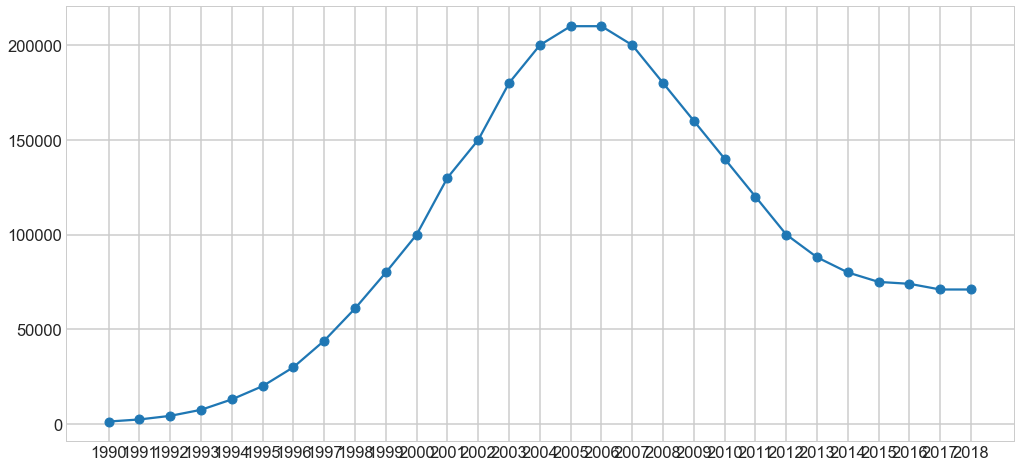

In [77]:
plt.figure(figsize=(17,8))
plt.plot(tmp0['year'],Estimate,'o-')